# OLS Regression
OLS model was run for six data sets and if not linear, various transformation were used to find a linear relation.

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from pandas.plotting import scatter_matrix

import statsmodels.formula.api as smf
import statsmodels.api as sm


## Reading Data

In [2]:
#reading all the sheets from excel files
d1=pd.read_excel('Assignment4_linear_regresion_data.xlsx', sheet_name='Set 1', names=['y1','x1'])
d2=pd.read_excel('Assignment4_linear_regresion_data.xlsx', sheet_name='Set 2', names=['y2','x2'])
d3=pd.read_excel('Assignment4_linear_regresion_data.xlsx', sheet_name='Set 3', names=['y3','x3'])
d4=pd.read_excel('Assignment4_linear_regresion_data.xlsx', sheet_name='Set 4', names=['y4','x4'])
d5=pd.read_excel('Assignment4_linear_regresion_data.xlsx', sheet_name='Set 5', names=['y5','x5'])
d6=pd.read_excel('Assignment4_linear_regresion_data.xlsx', sheet_name='Set 6', names=['y6','x6'])

#joining the dataframes into one dataframe
d = pd.concat([d1,d2,d3,d4,d5,d6], axis=1, sort=False)
d.tail()


,y1,x1,y2,x2,y3,x3,y4,x4,y5,x5,y6,x6
96,15.811618,4.106201,9.549490,1.769237,159.666278,1.325,1.015551e+06,8.5450,1.027913,0.94690,56.695106,8.7167
97,39.739810,7.612336,36.904564,7.474016,2087.069663,4.446,2.653507e+04,5.4277,33.965305,8.41480,70.342334,9.6165
98,7.963448,1.227335,4.750807,5.459608,206.866151,1.335,8.602001e+05,7.6067,39.077962,6.66190,20.791865,1.7477
99,46.095461,9.545883,15.409014,6.455433,2773.134726,4.587,2.847208e+06,9.2492,48.254626,9.51610,59.018123,8.3886
100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.032140,9.97071,252.837897,35.7834


## Analysing Data

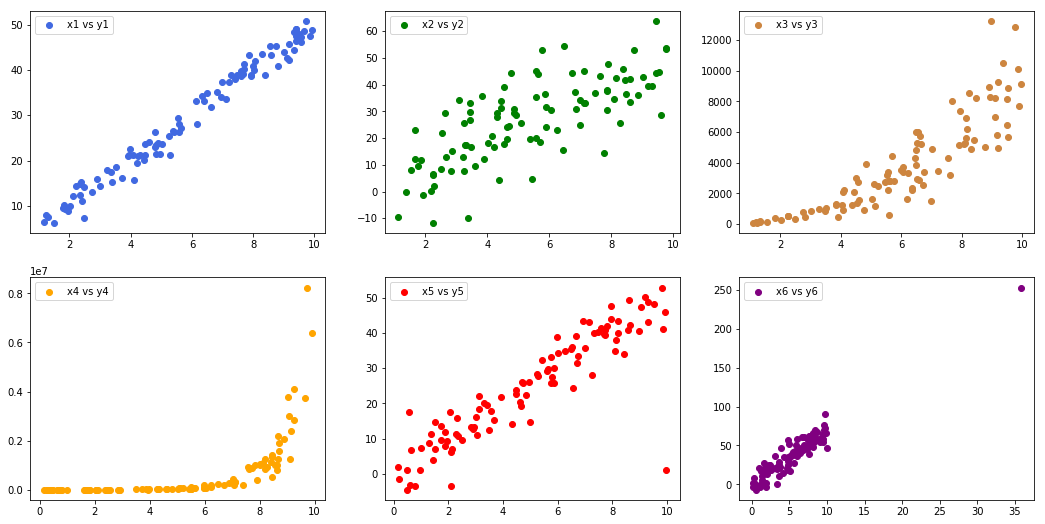

In [3]:
# plot the datasets
fig,axs=plt.subplots(2,3,figsize=(18,9))#,sharex=True, sharey=True

axs[0,0].scatter(d.x1, d.y1,color='royalblue', label='x1 vs y1')
axs[0,1].scatter(d.x2, d.y2,color='green', label='x2 vs y2')
axs[0,2].scatter(d.x3, d.y3,color='peru', label='x3 vs y3')

axs[1,0].scatter(d.x4, d.y4,color='orange', label='x4 vs y4')
axs[1,1].scatter(d.x5, d.y5,color='red', label='x5 vs y5')
axs[1,2].scatter(d.x6, d.y6,color='purple', label='x6 vs y6')

axs[0,0].legend()
axs[0,1].legend()
axs[0,2].legend()
axs[1,0].legend()
axs[1,1].legend()
axs[1,2].legend()


### Dataset 1 & 2

R_squared1= 0.979 / Intercept1 p_value= 0.613 / data1 p_value= 0.0 / Intercept1= 0.238 / slope1= 4.984
R_squared2= 0.555 / Intercept2 p_value= 0.668 / data2 p_value= 0.0 / Intercept2= 1.096 / slope2= 4.777


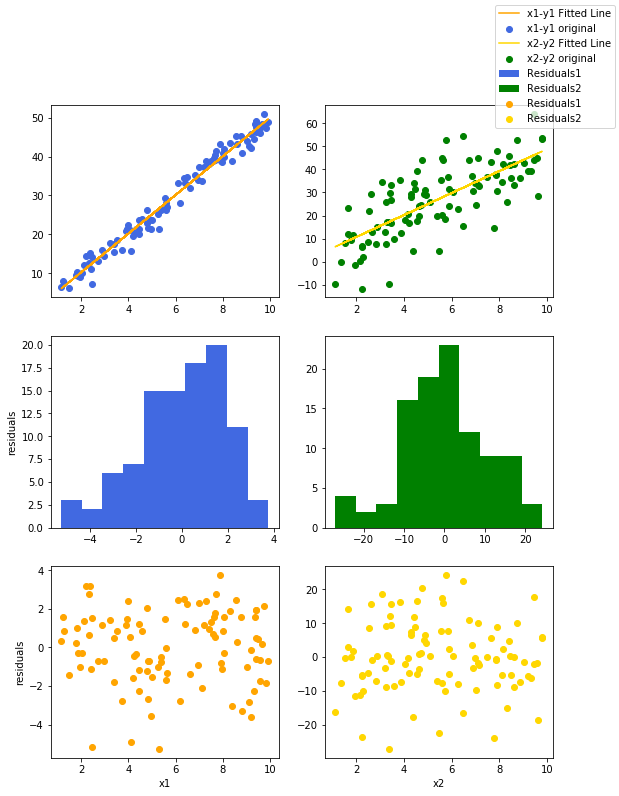

In [4]:
result1 = smf.ols(formula='d.y1 ~ d.x1', data=d).fit()
result2 = smf.ols(formula='d.y2 ~ d.x2', data=d).fit()

print('R_squared1=',round(result1.rsquared,3),'/ Intercept1 p_value=',round(result1.pvalues[0],3),
      '/ data1 p_value=',round(result1.pvalues[1],3),'/ Intercept1=',round(result1.params[0],3),
      '/ slope1=',round(result1.params[1],3))

print('R_squared2=',round(result2.rsquared,3),'/ Intercept2 p_value=',round(result2.pvalues[0],3),
      '/ data2 p_value=',round(result2.pvalues[1],3),'/ Intercept2=',round(result2.params[0],3),
      '/ slope2=',round(result2.params[1],3))

intercept1, slope1 = result1.params
d['Predicted1']=intercept1 + slope1 * d.x1

intercept2, slope2 = result2.params
d['Predicted2']=intercept2 + slope2 * d.x2



fig,axs=plt.subplots(3,2,figsize=(9,12))#,sharex=True, sharey=True

axs[0,0].scatter(d.x1, d.y1,color='royalblue', label='x1-y1 original')
axs[0,1].scatter(d.x2, d.y2,color='green', label='x2-y2 original')

axs[0,0].plot(d.x1, d.Predicted1, color= 'orange', label='x1-y1 Fitted Line')
axs[0,1].plot(d.x2, d.Predicted2, color= 'gold', label='x2-y2 Fitted Line')


d['Residuals1']= d.y1 -d.Predicted1
d['Residuals2']= d.y2 -d.Predicted2

# plot the histogram of residuals
axs[1,0].hist(d.Residuals1.dropna(),color='royalblue')
axs[1,1].hist(d.Residuals2.dropna(),color='g')


axs[2,0].scatter(d.x1,d.Residuals1,color='orange')
axs[2,1].scatter(d.x2,d.Residuals2,color='gold')

axs[2,0].set_xlabel('x1')
axs[2,1].set_xlabel('x2')

axs[1,0].set_ylabel('residuals')
axs[2,0].set_ylabel('residuals')

fig.legend()

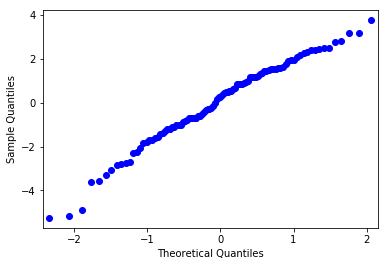

In [5]:
fig=sm.qqplot(d.Residuals1)

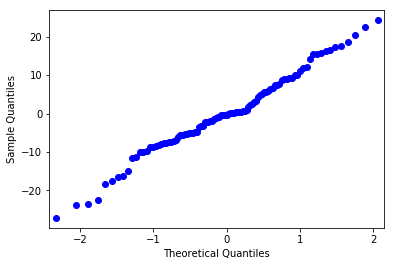

In [6]:
fig=sm.qqplot(d.Residuals2)

In [7]:
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   d.y1   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     4579.
Date:                Fri, 02 Aug 2019   Prob (F-statistic):           4.47e-84
Time:                        09:17:13   Log-Likelihood:                -206.03
No. Observations:                 100   AIC:                             416.1
Df Residuals:                      98   BIC:                             421.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2381      0.469      0.508      0.613      -0.693       1.169
d.x1           4.9843      0.074     67.669      0.000       4.838       5.130
==============================================================================
Omnibus:                        4.971   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.083   Jarque-Bera (JB):                4.783
Skew:                          -0.536   Prob(JB):                       0.0915
Kurtosis:                       2.988   Cond. No.                         15.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   d.y2   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     122.4
Date:                Fri, 02 Aug 2019   Prob (F-statistic):           6.11e-19
Time:                        09:17:13   Log-Likelihood:                -375.73
No. Observations:                 100   AIC:                             755.5
Df Residuals:                      98   BIC:                             760.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0956      2.547      0.430      0.668      -3.958       6.149
d.x2           4.7774      0.432     11.062      0.000       3.920       5.634
==============================================================================
Omnibus:                        0.254   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.881   Jarque-Bera (JB):                0.079
Skew:                          -0.065   Prob(JB):                        0.961
Kurtosis:                       3.045   Cond. No.                         14.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Dataset 3

In [9]:
result3_org = smf.ols(formula='d.y3 ~ d.x3', data=d).fit()
result3_org.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   d.y3   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     302.4
Date:                Fri, 02 Aug 2019   Prob (F-statistic):           1.04e-31
Time:                        09:17:13   Log-Likelihood:                -873.07
No. Observations:                 100   AIC:                             1750.
Df Residuals:                      98   BIC:                             1755.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2636.1748    402.741     -6.546      0.000   -3435.400   -1836.949
d.x3        1081.8266     62.216     17.388      0.000     958.361    1205.292
==============================================================================
Omnibus:                       21.170   Durbin-Watson:                   2.159
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.896
Skew:                           0.863   Prob(JB):                     5.90e-09
Kurtosis:                       5.474   Cond. No.                         17.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R_squared3_org= 0.755 / Intercept3 p_value= 0.0 / data3 p_value= 0.0 / Intercept3= -2636.175 / slope3= 1081.827


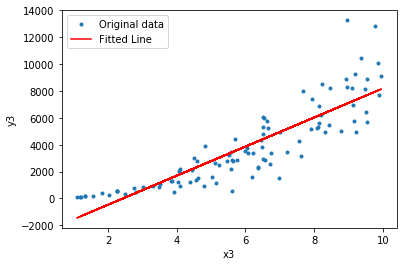

In [10]:
print('R_squared3_org=',round(result3_org.rsquared,3),'/ Intercept3 p_value=',round(result3_org.pvalues[0],3),
      '/ data3 p_value=',round(result3_org.pvalues[1],3),'/ Intercept3=',round(result3_org.params[0],3),
      '/ slope3=',round(result3_org.params[1],3))

plt.plot(d.x3, d.y3, 'o', label='Original data', markersize=3)
intercept, slope = result3_org.params
d['Predicted3_org']=intercept + slope * d.x3
plt.plot(d.x3, d.Predicted3_org, 'r-', label='Fitted Line')
plt.xlabel('x3')
plt.ylabel('y3')
plt.legend()
plt.show()


#### Transform Dataset 3

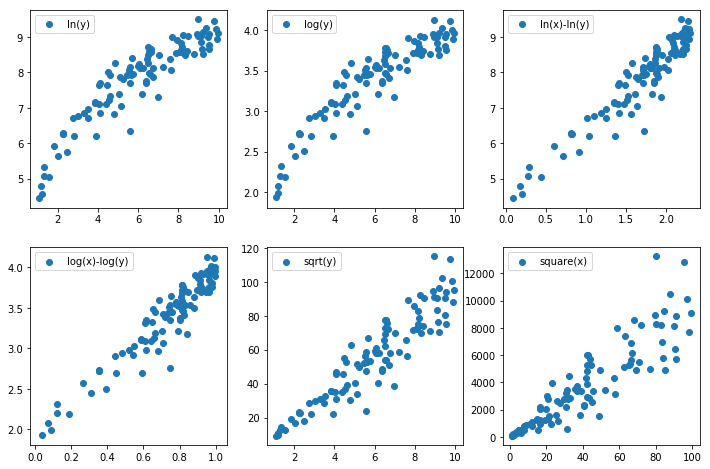

In [11]:
fig,axs=plt.subplots(2,3,figsize=(12,8))

d['logy3']=np.log(d.y3)
d['log10y3']=np.log10(d.y3)

d['logx3']=np.log(d.x3)
d['log10x3']=np.log10(d.x3)

d['sqrty3']=np.sqrt(d.y3)
d['sqrx3']=np.square(d.x3)

axs[0,0].scatter(d.x3, d.logy3,label='ln(y)')
axs[0,1].scatter(d.x3, d.log10y3,label='log(y)')
axs[0,2].scatter(d.logx3, d.logy3,label='ln(x)-ln(y)')

axs[1,0].scatter(d.log10x3, d.log10y3,label='log(x)-log(y)')
axs[1,1].scatter(d.x3, d.sqrty3,label='sqrt(y)')
axs[1,2].scatter(d.sqrx3, d.y3,label='square(x)')


axs[0,0].legend()
axs[0,1].legend()
axs[0,2].legend()
axs[1,0].legend()
axs[1,1].legend()
axs[1,2].legend()

In [12]:
result3_lnxy = smf.ols(formula='d.logy3 ~ d.logx3', data=d).fit()
result3_lnxy.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                d.logy3   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     904.8
Date:                Fri, 02 Aug 2019   Prob (F-statistic):           2.74e-51
Time:                        09:17:14   Log-Likelihood:                -40.302
No. Observations:                 100   AIC:                             84.60
Df Residuals:                      98   BIC:                             89.81
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.3508      0.120     36.221      0.000       4.112       4.589
d.logx3        2.0535      0.068     30.079      0.000       1.918       2.189
==============================================================================
Omnibus:                       27.640   Durbin-Watson:                   1.760
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.511
Skew:                          -1.126   Prob(JB):                     1.08e-11
Kurtosis:                       5.656   Cond. No.                         7.51
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

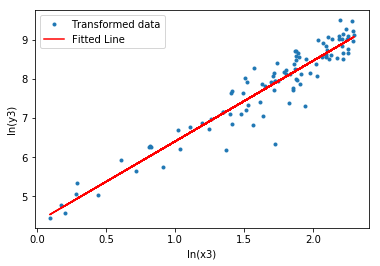

In [13]:
intercept, slope = result3_lnxy.params
d['Predicted3_lnxy']=intercept + slope * d.logx3

d['Residuals3_lnxy']= d.Predicted3_lnxy - d.logy3


plt.plot(d.logx3, d.logy3, 'o', label='Transformed data', markersize=3)

plt.plot(d.logx3, d.Predicted3_lnxy, 'r-', label='Fitted Line')
plt.xlabel('ln(x3)')
plt.ylabel('ln(y3)')
plt.legend()
plt.show()

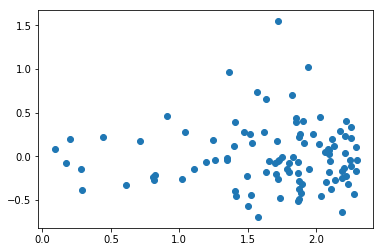

In [14]:
plt.scatter(d.logx3,d.Residuals3_lnxy)

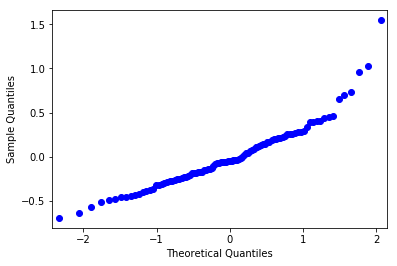

In [15]:
fig=sm.qqplot(d.Residuals3_lnxy)

### Dataset 4

In [16]:
result4_org = smf.ols(formula='d.y4 ~ d.x4', data=d).fit()
result4_org.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   d.y4   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.373
Method:                 Least Squares   F-statistic:                     59.97
Date:                Fri, 02 Aug 2019   Prob (F-statistic):           8.87e-12
Time:                        09:17:15   Log-Likelihood:                -1526.2
No. Observations:                 100   AIC:                             3056.
Df Residuals:                      98   BIC:                             3062.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7.535e+05    2.1e+05     -3.585      0.001   -1.17e+06   -3.36e+05
d.x4        2.707e+05   3.49e+04      7.744      0.000    2.01e+05     3.4e+05
==============================================================================
Omnibus:                      102.143   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1253.666
Skew:                           3.381   Prob(JB):                    5.89e-273
Kurtosis:                      18.973   Cond. No.                         12.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

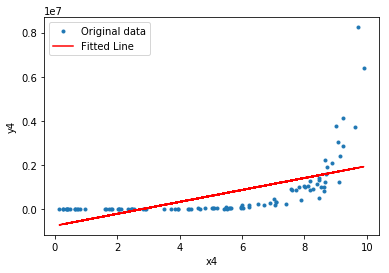

In [17]:
plt.plot(d.x4, d.y4, 'o', label='Original data', markersize=3)
intercept, slope = result4_org.params
d['Predicted4_org']=intercept + slope * d.x4
plt.plot(d.x4, d.Predicted4_org, 'r-', label='Fitted Line')
plt.xlabel('x4')
plt.ylabel('y4')
plt.legend()
plt.show()

#### Transform Dataset 4

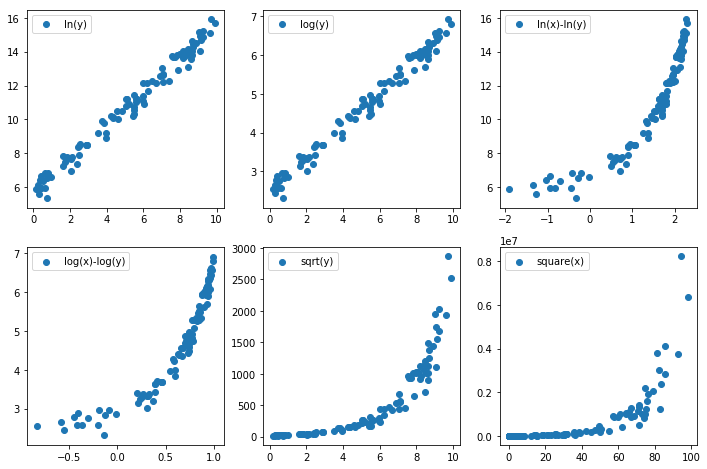

In [18]:
# plot the histogram of residuals
fig,axs=plt.subplots(2,3,figsize=(12,8))#,sharex=True, sharey=True

d['logy4']=np.log(d.y4)
d['log10y4']=np.log10(d.y4)

d['logx4']=np.log(d.x4)
d['log10x4']=np.log10(d.x4)

d['sqrty4']=np.sqrt(d.y4)
d['sqrx4']=np.square(d.x4)


axs[0,0].scatter(d.x4, d.logy4,label='ln(y)')
axs[0,1].scatter(d.x4, d.log10y4,label='log(y)')
axs[0,2].scatter(d.logx4, d.logy4,label='ln(x)-ln(y)')

axs[1,0].scatter(d.log10x4, d.log10y4,label='log(x)-log(y)')
axs[1,1].scatter(d.x4, d.sqrty4,label='sqrt(y)')
axs[1,2].scatter(d.sqrx4, d.y4,label='square(x)')


axs[0,0].legend()
axs[0,1].legend()
axs[0,2].legend()
axs[1,0].legend()
axs[1,1].legend()
axs[1,2].legend()


In [19]:
result4_lny = smf.ols(formula='d.logy4 ~ d.x4', data=d).fit()
result4_lny.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                d.logy4   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     5765.
Date:                Fri, 02 Aug 2019   Prob (F-statistic):           6.91e-89
Time:                        09:17:16   Log-Likelihood:                -46.034
No. Observations:                 100   AIC:                             96.07
Df Residuals:                      98   BIC:                             101.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.6647      0.078     72.264      0.000       5.509       5.820
d.x4           0.9898      0.013     75.930      0.000       0.964       1.016
==============================================================================
Omnibus:                        7.020   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.030   Jarque-Bera (JB):                7.256
Skew:                          -0.657   Prob(JB):                       0.0266
Kurtosis:                       2.872   Cond. No.                         12.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

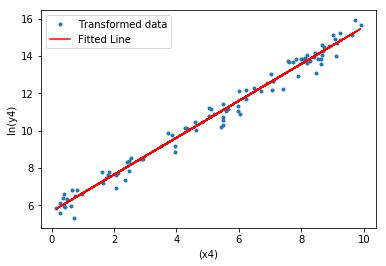

In [22]:

intercept, slope = result4_lny.params

d['Predicted4_lny']=intercept + slope * d.x4

d['Residuals4_lny']= d.Predicted4_lny - d.logy4


plt.plot(d.x4, d.logy4, 'o', label='Transformed data', markersize=3)

plt.plot(d.x4, d.Predicted4_lny, 'r-', label='Fitted Line')
plt.xlabel('(x4)')
plt.ylabel('ln(y4)')
plt.legend()
plt.show()

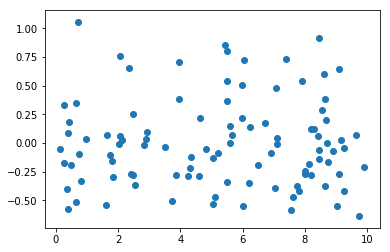

In [23]:
plt.scatter(d.x4,d.Residuals4_lny)

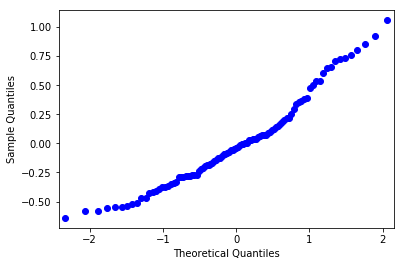

In [24]:
fig=sm.qqplot(d.Residuals4_lny)

### Dataset 5 & 6

R_squared5= 0.806 / Intercept5 p_value= 0.495 / data5 p_value= 0.0 / Intercept5= 0.921 / slope5= 4.767
R_squared6= 0.913 / Intercept6 p_value= 0.842 / data6 p_value= 0.0 / Intercept6= -0.306 / slope6= 7.027


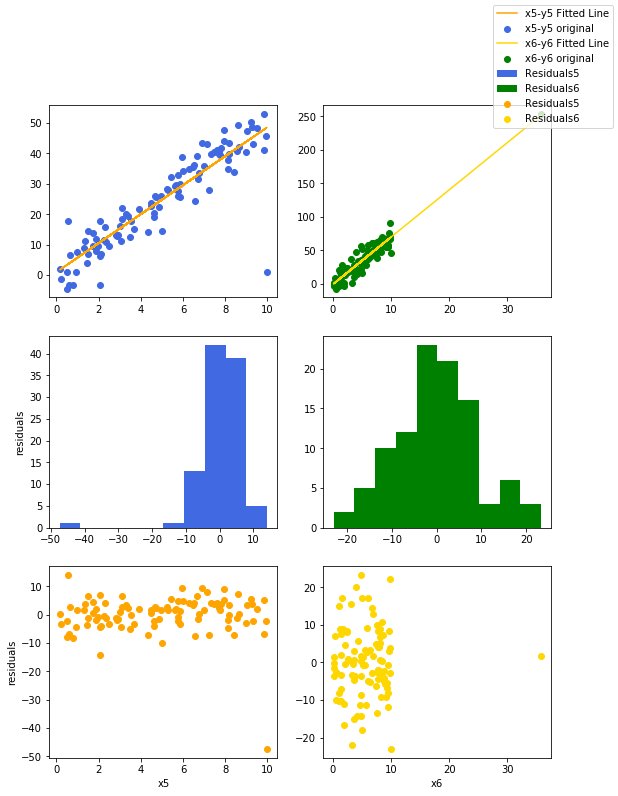

In [25]:
result5 = smf.ols(formula='d.y5 ~ d.x5', data=d).fit()
result6 = smf.ols(formula='d.y6 ~ d.x6', data=d).fit()

print('R_squared5=',round(result5.rsquared,3),'/ Intercept5 p_value=',round(result5.pvalues[0],3),
      '/ data5 p_value=',round(result5.pvalues[1],3),'/ Intercept5=',round(result5.params[0],3),
      '/ slope5=',round(result5.params[1],3))

print('R_squared6=',round(result6.rsquared,3),'/ Intercept6 p_value=',round(result6.pvalues[0],3),
      '/ data6 p_value=',round(result6.pvalues[1],3),'/ Intercept6=',round(result6.params[0],3),
      '/ slope6=',round(result6.params[1],3))

intercept5, slope5 = result5.params
d['Predicted5']=intercept5 + slope5 * d.x5

intercept6, slope6 = result6.params
d['Predicted6']=intercept6 + slope6 * d.x6



fig,axs=plt.subplots(3,2,figsize=(9,12))#,sharex=True, sharey=True

axs[0,0].scatter(d.x5, d.y5,color='royalblue', label='x5-y5 original')
axs[0,1].scatter(d.x6, d.y6,color='green', label='x6-y6 original')

axs[0,0].plot(d.x5, d.Predicted5, color= 'orange', label='x5-y5 Fitted Line')
axs[0,1].plot(d.x6, d.Predicted6, color= 'gold', label='x6-y6 Fitted Line')


d['Residuals5']= d.y5 -d.Predicted5
d['Residuals6']= d.y6 -d.Predicted6

# plot the histogram of residuals
axs[1,0].hist(d.Residuals5,color='royalblue')
axs[1,1].hist(d.Residuals6,color='g')


axs[2,0].scatter(d.x5,d.Residuals5,color='orange')
axs[2,1].scatter(d.x6,d.Residuals6,color='gold')

axs[2,0].set_xlabel('x5')
axs[2,1].set_xlabel('x6')

axs[1,0].set_ylabel('residuals')
axs[2,0].set_ylabel('residuals')

fig.legend()

In [26]:
result5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   d.y5   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     411.9
Date:                Fri, 02 Aug 2019   Prob (F-statistic):           4.70e-37
Time:                        09:18:27   Log-Likelihood:                -334.42
No. Observations:                 101   AIC:                             672.8
Df Residuals:                      99   BIC:                             678.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9213      1.346      0.685      0.495      -1.749       3.591
d.x5           4.7671      0.235     20.294      0.000       4.301       5.233
==============================================================================
Omnibus:                      113.783   Durbin-Watson:                   1.491
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2578.951
Skew:                          -3.591   Prob(JB):                         0.00
Kurtosis:                      26.691   Cond. No.                         11.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
result6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   d.y6   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     1041.
Date:                Fri, 02 Aug 2019   Prob (F-statistic):           2.49e-54
Time:                        09:18:27   Log-Likelihood:                -367.52
No. Observations:                 101   AIC:                             739.0
Df Residuals:                      99   BIC:                             744.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3059      1.534     -0.199      0.842      -3.350       2.739
d.x6           7.0272      0.218     32.259      0.000       6.595       7.459
==============================================================================
Omnibus:                        0.494   Durbin-Watson:                   2.255
Prob(Omnibus):                  0.781   Jarque-Bera (JB):                0.262
Skew:                           0.120   Prob(JB):                        0.877
Kurtosis:                       3.070   Cond. No.                         11.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Removing Outliers

In [28]:
#removing outliner
print(d[d.x6>20].index)
print(d[((d.x5>8) & (d.y5<10))].index)


Int64Index([100], dtype='int64')
Int64Index([100], dtype='int64')


In [29]:
d['x5_out']=d.x5[:100]
d['y5_out']=d.y5[:100]
d['x6_out']=d.x6[:100]
d['y6_out']=d.y6[:100]


R_squared5_out= 0.906 / Intercept5_out p_value= 0.916 / data5_out p_value= 0.0 / Intercept5_out= -0.099 / slope5_out= 5.071
R_squared6_out= 0.837 / Intercept6_out p_value= 0.991 / data6_out p_value= 0.0 / Intercept6_out= -0.02 / slope6_out= 6.97


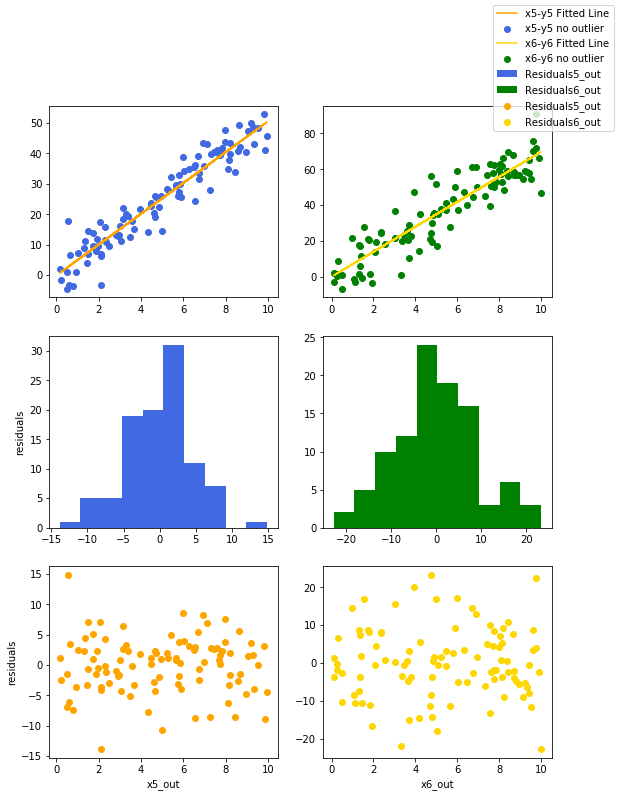

In [32]:
result5_out = smf.ols(formula='d.y5_out ~ d.x5_out', data=d).fit()
result6_out = smf.ols(formula='d.y6_out ~ d.x6_out', data=d).fit()

print('R_squared5_out=',round(result5_out.rsquared,3),'/ Intercept5_out p_value=',round(result5_out.pvalues[0],3),
      '/ data5_out p_value=',round(result5_out.pvalues[1],3),'/ Intercept5_out=',round(result5_out.params[0],3),
      '/ slope5_out=',round(result5_out.params[1],3))

print('R_squared6_out=',round(result6_out.rsquared,3),'/ Intercept6_out p_value=',round(result6_out.pvalues[0],3),
      '/ data6_out p_value=',round(result6_out.pvalues[1],3),'/ Intercept6_out=',round(result6_out.params[0],3),
      '/ slope6_out=',round(result6_out.params[1],3))

intercept5_out, slope5_out = result5_out.params
d['Predicted5_out']=intercept5_out + slope5_out * d.x5_out

intercept6_out, slope6_out = result6_out.params
d['Predicted6_out']=intercept6_out + slope6_out * d.x6_out



fig,axs=plt.subplots(3,2,figsize=(9,12))

axs[0,0].scatter(d.x5_out, d.y5_out,color='royalblue', label='x5-y5 no outlier')
axs[0,1].scatter(d.x6_out, d.y6_out,color='green', label='x6-y6 no outlier')

axs[0,0].plot(d.x5_out, d.Predicted5_out, color= 'orange', label='x5-y5 Fitted Line')
axs[0,1].plot(d.x6_out, d.Predicted6_out, color= 'gold', label='x6-y6 Fitted Line')


d['Residuals5_out']= d.y5_out -d.Predicted5_out
d['Residuals6_out']= d.y6_out -d.Predicted6_out

# plot the histogram of residuals
axs[1,0].hist(d.Residuals5_out.dropna(),color='royalblue')
axs[1,1].hist(d.Residuals6_out.dropna(),color='g')


axs[2,0].scatter(d.x5_out,d.Residuals5_out,color='orange')
axs[2,1].scatter(d.x6_out,d.Residuals6_out,color='gold')

axs[2,0].set_xlabel('x5_out')
axs[2,1].set_xlabel('x6_out')

axs[1,0].set_ylabel('residuals')
axs[2,0].set_ylabel('residuals')

fig.legend()

In [33]:
result5_out.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               d.y5_out   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     945.8
Date:                Fri, 02 Aug 2019   Prob (F-statistic):           3.84e-52
Time:                        09:19:22   Log-Likelihood:                -294.13
No. Observations:                 100   AIC:                             592.3
Df Residuals:                      98   BIC:                             597.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0993      0.935     -0.106      0.916      -1.954       1.756
d.x5_out       5.0705      0.165     30.753      0.000       4.743       5.398
==============================================================================
Omnibus:                        3.022   Durbin-Watson:                   1.918
Prob(Omnibus):                  0.221   Jarque-Bera (JB):                2.760
Skew:                          -0.158   Prob(JB):                        0.252
Kurtosis:                       3.750   Cond. No.                         11.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
result6_out.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               d.y6_out   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     502.7
Date:                Fri, 02 Aug 2019   Prob (F-statistic):           2.29e-40
Time:                        09:19:22   Log-Likelihood:                -364.34
No. Observations:                 100   AIC:                             732.7
Df Residuals:                      98   BIC:                             737.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0203      1.899     -0.011      0.991      -3.788       3.748
d.x6_out       6.9703      0.311     22.420      0.000       6.353       7.587
==============================================================================
Omnibus:                        0.459   Durbin-Watson:                   2.259
Prob(Omnibus):                  0.795   Jarque-Bera (JB):                0.261
Skew:                           0.123   Prob(JB):                        0.877
Kurtosis:                       3.044   Cond. No.                         12.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Summary

In [35]:
# Summary table
Model_Summary=pd.DataFrame({
               '1) R_squared':[(result1.rsquared),(result2.rsquared),(result3_org.rsquared),
                               (result3_lnxy.rsquared),(result4_org.rsquared),(result4_lny.rsquared),
                            (result5.rsquared),(result5_out.rsquared),(result6.rsquared),(result6_out.rsquared)],
                '2) y p_value':[(result1.pvalues[0]),(result2.pvalues[0]),(result3_org.pvalues[0]),
                               (result3_lnxy.pvalues[0]),(result4_org.pvalues[0]),(result4_lny.pvalues[0]),
                            (result5.pvalues[0]),(result5_out.pvalues[0]),(result6.pvalues[0]),(result6_out.pvalues[0])], 
                '3) x p_value':[(result1.pvalues[1]),(result2.pvalues[1]),(result3_org.pvalues[1]),
                               (result3_lnxy.pvalues[1]),(result4_org.pvalues[1]),(result4_lny.pvalues[1]),
                            (result5.pvalues[1]),(result5_out.pvalues[1]),(result6.pvalues[1]),(result6_out.pvalues[1])],
                '4) Intercept':[(result1.params[0]),(result2.params[0]),(result3_org.params[0]),
                               (result3_lnxy.params[0]),(result4_org.params[0]),(result4_lny.params[0]),
                            (result5.params[0]),(result5_out.params[0]),(result6.params[0]),(result6_out.params[0])],
                '5) Slope':[(result1.params[1]),(result2.params[1]),(result3_org.params[1]),
                               (result3_lnxy.params[1]),(result4_org.params[1]),(result4_lny.params[1]),
                            (result5.params[1]),(result5_out.params[1]),(result6.params[1]),(result6_out.params[1])],},
                           index=['Dataset1','Dataset2','Dataset3_org','Dataset3_ln(x)_ln(y)','Dataset4_org',
                                  'Dataset4_ln(y)','Dataset5','Dataset5_out','Dataset6','Dataset6_out'])
                            
round(Model_Summary ,3)                          


,1) R_squared,2) y p_value,3) x p_value,4) Intercept,5) Slope
Dataset1,0.979,0.613,0.0,0.238,4.984
Dataset2,0.555,0.668,0.0,1.096,4.777
Dataset3_org,0.755,0.000,0.0,-2636.175,1081.827
Dataset3_ln(x)_ln(y),0.902,0.000,0.0,4.351,2.053
Dataset4_org,0.380,0.001,0.0,-753498.668,270653.490
Dataset4_ln(y),0.983,0.000,0.0,5.665,0.990
Dataset5,0.806,0.495,0.0,0.921,4.767
Dataset5_out,0.906,0.916,0.0,-0.099,5.071
Dataset6,0.913,0.842,0.0,-0.306,7.027
Dataset6_out,0.837,0.991,0.0,-0.020,6.970
